# Assessment: Unit 3
--------------------

Complete the problems below in your copy of the Jupyter Notebook.

## Problem 3.1.

The [American Chemistry Council (ACC)](https://www.americanchemistry.com/chemistry-in-america/data-industry-statistics/statistics-on-the-plastic-resins-industry) tracks the annual production of polymers in the United States. Some of the basic industry statistics are made publicly available for download. The file `polymer_production.csv` contains information from the [PIPS Resin Sales and Production CY Figures, 2021 v 2020](https://www.americanchemistry.com/content/download/10906/file/ACC-PIPS-Resin-Sales-and-Production-CY-Figures-2021vs2020.pdf) report, giving 2021 production of thermoplastics in millions of pounds. Visualize this data, highlighting the top 3 polymers produced in 2021. To make the units more globally-relevent, plot the data in metric kilotons (1 kt = 2.2 million pounds).

1. Load the file `polymer_production.csv` and create a horizontal bar chart for the values of <>, with axis labels and title.
   - Plot the bars at 50% transparency
   - Plot the top 3 values in another color to highlight these values
2. Save the plot to the output directory as `problem3-1a.png` at 60 dpi
3. Save the plot to the output directory as `problem3-1b.png` at 600 dpi
4. Write down the differences between these files in terms of file size and quality

BONUS: determine a method to sort the data frame with production volume in descending order *and* with the "Other thermoplastics" category remaining at the bottom of the list. Plot the data using this order, again highlighting the top 3 polymers. Save this to the output directory as `problem3-1c.png`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# read the raw data, print out the head of the DataFrame to get the column names
df_polymer = pd.read_csv('../../data/polymer_production.csv')
df_polymer.head()

,Polymer,Production-MillionLbs
0,Low-density polyethylene,8510
1,Linear low-density polyethylene,21721
2,High-density polyethylene,22082
3,Polypropylene,17806
4,Polystyrene,5046


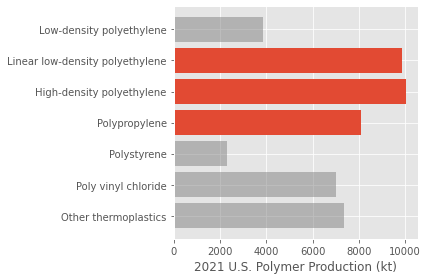

In [2]:
# create a new column for the converted units
df_polymer['Production-kt'] = df_polymer['Production-MillionLbs'] / 2.2

# sort by volume
df_polymer = df_polymer.sort_values('Production-kt', ascending=False)

# select top 3
df_polymer_top3 = df_polymer.head(3)

# plot the initial values
fig, ax = plt.subplots()
ax.barh(df_polymer.index, df_polymer['Production-kt'], tick_label=df_polymer['Polymer'], alpha=0.5, color='gray')
ax.barh(df_polymer_top3.index, df_polymer_top3['Production-kt'])

ax.invert_yaxis()

ax.set_xlabel('2021 U.S. Polymer Production (kt)')

# save files, use plt.tight_layout() force matplotlib to render the plot before saving
plt.tight_layout()
plt.savefig('../../output/problem3-1a.png', dpi=60)
plt.savefig('../../output/problem3-1b.png', dpi=600)

bonus: sort the data, but leave "Other"

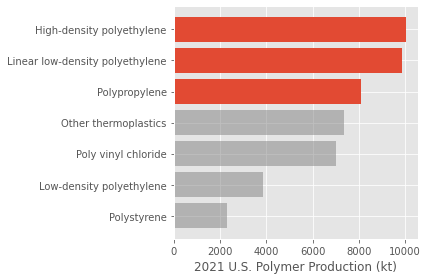

In [3]:
# create a 
df_bonus = df_polymer.copy()

df_bonus['IsOther'] = df_bonus['Polymer']=='Other thermoplastics'
df_bonus.sort_values(['IsOther', 'Production-kt'], ascending=[True, False])

df_bonus.reset_index(drop=True, inplace=True)

# select top 3
df_bonus_top3 = df_bonus.head(3)

# plot the initial values
fig, ax = plt.subplots()
ax.barh(df_bonus.index, df_bonus['Production-kt'], tick_label=df_bonus['Polymer'], alpha=0.5, color='gray')
ax.barh(df_bonus_top3.index, df_bonus_top3['Production-kt'])

ax.invert_yaxis()

ax.set_xlabel('2021 U.S. Polymer Production (kt)')


# save files, use plt.tight_layout() force matplotlib to render the plot before saving
plt.tight_layout()
plt.savefig('../../output/problem3-1c.png', dpi=300)

## Problem 3.2.

Modify the function that you created for Unit 1 to represent the Gaussian (normal) probability distribution to use the `numpy` math functions.

1. Create a figure, axis using `plt.subplots()` and set the y-axis limits to $\left[0,0.5\right]$
2. Plot this function, with $\mu_1=2$ and $\sigma_1=1.5$, as a line on the interval [-5, 10], using 100 points in the range
   - Add dashed vertical lines at $\mu_1 \pm 3\sigma_1$
   - Add text centered on the mean in the $x$ direction and 10% above the maximum value of $y$ to provide the value of the mean
   - Plot the function and lines in red
3. On the same plot add this function, with $\mu_2=10$ and $\sigma_2=1$, as a line on the interval [5, 15], using 10 points in the range
   - Add dashed vertical lines at $\mu_2 \pm 3\sigma_2$
   - Add text centered on the mean in the $x$ direction and 10% above the maximum value of $y$ to provide the value of the mean
   - Plot the function and lines in blue
4. Save the plot to the output directory as `problem3-2.pdf`
5. Open the file and zoom in to 600%
   - What happens to the image quality?
   - What are the differences between the curves for parts 2 and 3?

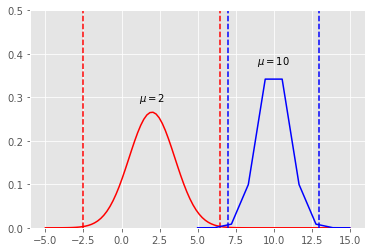

In [4]:
# modified gaussian function
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):

    # parts of equation broken out for improved readability (not required)
    scale_factor = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * (x - mu)**2 / sigma**2

    # complete the equation, using the pieces defined above, and return result
    return scale_factor * np.exp(exponent)


# part 1
fig, ax = plt.subplots()
ax.set_ylim((0, 0.5))


# part 2
x1 = np.linspace(-5, 15, 100)
mu1 = 2
sigma1 = 1.5

# calculate the resulting function, given the values that we've defined
y1 = gaussian(x1, mu1, sigma1)
ax.plot(x1, y1, c='red')

# add the vertical lines and text
ax.axvline(mu1-3*sigma1, ls='--', c='red')
ax.axvline(mu1+3*sigma1, ls='--', c='red')

ax.text(mu1, y1.max()*1.1, f'$\mu=${mu1}', ha='center')


# part 3
x2 = np.linspace(5, 15, 10)
mu2 = 10
sigma2 = 1

# calculate the resulting function, given the values that we've defined
y2 = gaussian(x2, mu2, sigma2)
ax.plot(x2, y2, c='blue')

# add the vertical lines and text
ax.axvline(mu2-3*sigma2, ls='--', c='blue')
ax.axvline(mu2+3*sigma2, ls='--', c='blue')

ax.text(mu2, y2.max()*1.1, f'$\mu=${mu2}', ha='center')


# part 4
plt.savefig('../../output/problem3-2.pdf')


## Problem 3.3.

Retail food packages are commonly made by welding plastic films under pressure, at temperatures above their melting point. To test the welding behavior of different polymers, *heat seal curve* is generated, which measures the force required to separate the weld as a function of increasing temperature. For many materials, there is some critical temperature where the failure mode shifts from a peelable seal to a *destruct* seal (where the film fails catastrophically). If you have struggled to open a package that was *supposed* to be peelable, you have experienced this phenomena first hand.

The file `seal_curve.csv` contains such a seal curve, in a format with columns for the temperature (°C), replicate, breaking force (N) and failure mode (0=peelable, 1=destruct). 

Repeat these steps to create a separate plot for each of the `default`, `ggplot` plot styles:

1. Plot the individual points as an 'x'
2. Plot a dotted line connecting the points
3. Add a dashed horizontal line at <>
4. Plot any points > <> as circles
5. Save the plot to the output directory as `problem3-3-<stylename>.png` at 300 dpi

In [5]:
seal_df = pd.read_csv('../../data/seal_curve.csv')
seal_df.head()

,temperature,replicate,peak_strength,failure_mode
0,80,1,0.0,0
1,80,2,0.0,0
2,80,3,0.0,0
3,85,1,0.0,0
4,85,2,0.0,0


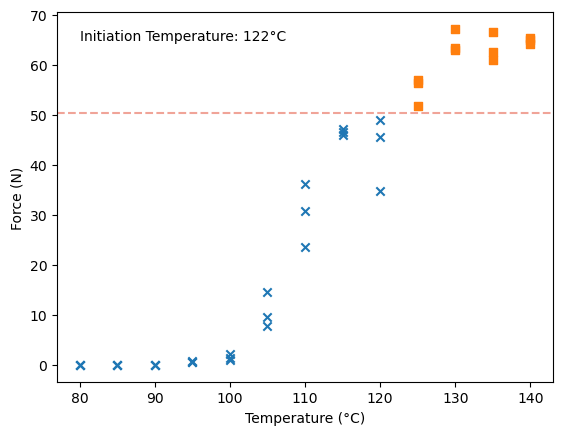

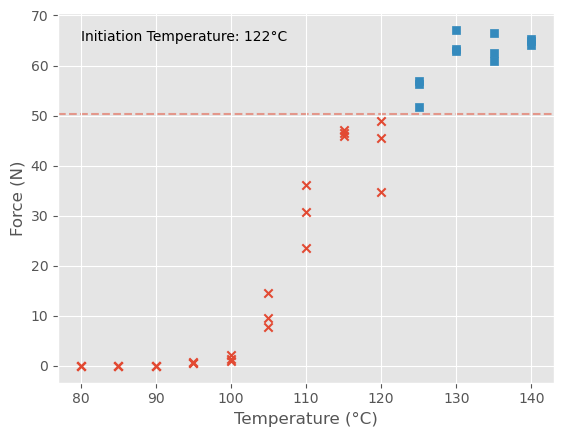

In [6]:
peelable_df = seal_df[seal_df['failure_mode']==0]
destruct_df = seal_df[seal_df['failure_mode']==1]

destruct_force = (peelable_df['peak_strength'].max() + destruct_df['peak_strength'].min())/2
initiation_temp = (peelable_df['temperature'].max() + destruct_df['temperature'].min())/2


# STYLE=default
plt.style.use('default')

fig, ax = plt.subplots()

ax.scatter(peelable_df['temperature'], peelable_df['peak_strength'], marker='x')
ax.scatter(destruct_df['temperature'], destruct_df['peak_strength'], marker='s')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Force (N)')

ax.axhline(destruct_force, ls='--', zorder=0, alpha=0.5)
ax.text(80, 65, f'Initiation Temperature: {initiation_temp:0.0f}°C')

plt.savefig('../../output/problem3-3-default.png', dpi=300)


# STYLE=ggplot
plt.style.use('ggplot')

fig, ax = plt.subplots()

ax.scatter(peelable_df['temperature'], peelable_df['peak_strength'], marker='x')
ax.scatter(destruct_df['temperature'], destruct_df['peak_strength'], marker='s')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Force (N)')

ax.axhline(destruct_force, ls='--', zorder=0, alpha=0.5)
ax.text(80, 65, f'Initiation Temperature: {initiation_temp:0.0f}°C')

plt.savefig('../../output/problem3-3-ggplot.png', dpi=300)


--------------
## Next Steps:

1. Advance to [Unit 4](../04-pandas-dataframe/unit04-lesson.ipynb) when you're ready for the next step